## 01) Word Embedding
* 단어를 벡터로 표현하는 방법
* 단어를 밀집 표현으로 변환

### 1. 희소 표현 Sparse Representation
* 정의: 벡터/행렬의 값이 대부분이 0으로 표현되는 방법
  * 원-핫 벡터는 희소 벡터
* 문제점: 단어 개수 늘어나면 벡터의 차원이 한없이 커짐.. 공간적 낭비 + 단어의 의미 담지 못함

### 2. 밀집 표현 Dense Representation
  * 벡터의 차원을 단어 집합의 크기로 상정하지 않음
  * 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
  * 0과 1만이 아니라 실수값 가짐

### 3. 워드 임베딩
  * 단어를 dense vector의 형태로 표현하는 방법
  * Aka Embedding vector (밀집 벡터를 워드 임베딩 과정을 통해 나온 결과)
  * ex) LSA, Word2Vec, FastText, Glove

## 02) Word2Vec
* 단어 간 유사도를 반영할 수 있도록 단어의 의미 벡터화 해야됨
### 1. 희소 표현 Sparse Representation
  * 희소 벡터(ex. 원-핫 벡터)는 각 단어 간 유사성 표현 못함
    * 단어의 '의미'를 다차원 공간에 벡터화. 이러한 표현 방법을 **분산 표현(Distributed represntation)**

### 2. 분산 표현 Distributed Representation
  * Based on 분포 가설 Distributional hypothesis: 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가짐
  * 요약: 희소 차원은 고차원에 각 차원이 분리된 표현 방법, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현. ==> 단어 간 유사도 계싼 가능

### 3. CBOW(Continuous Bag of Words)
  * Word2Vec은 CBOW와 Skip-Gram 두 가지
  * CBOW: 주변에 있는 단어(context word)들을 가지고 중간에 있는 단어(center word) 예측
  * Skip-Gram: 중간에 있는 단어로 주변 단어들을 예측  

  * Window: 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지 범위
  * Sliding window: Window를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터셋 만들기

  * 과정 설명: 
  1. 입력층의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안 주변 단어들의 원-핫 벡터가 들어감
  2. 출력층에서 예측하고자 하는 '중간 단어의 원-핫 벡터'가 필요
    * 이는 Word2Vec의 학습을 위해서 필요
  * 추가: Word2Vec은 Deep Learning Model이 아님.
    * 딥러닝: 입력층과 출력층 사이의 은닉층의 개수가 충분히 쌓인 신경망 학습
    * Word2vec: 입력층과 출력층 사이 하나의 은닉층만 존재. Shallow Neural Network
      * (+) 은닉층에 활성화 함수 존재하지 않으며, 룩업 테이블이라는 연산을 담당하는 층.. 그래서 투사층 projection layer이라고도 부름  

  * 동작 메커니즘:
  1. 투사층의 크기가 M(입력층은 VxM)
  2. 입력층과 투사층 사이의 가중치 W는 VxM, 투사층과 출력층 사이의 가중치 W'는 MxV
  * 투사층에서 평균을 구하는 부분은 **CBOW가 Skip-Gram과 다른 차이점**
    * Skip-Gram은 입력이 중심 단어 하나. 투사층에서 벡터의 평균을 구하지 않음

### 4. Skip-Gram
  * 전반적으로 성능 더 좋음  

### 5. NNLM vs. Word2Vec
#### 차이점
1. 
  * 신경망 언어 모델(NNLM): 언어 모델로 **다음 대상 예측**
  * Word2Vec: 워드 임베딩 자체가 목적. **다음 단어가 아닌 중심 단어를 예측하여 학습**
    * => NNLM은 예측 단어의 이전 단어들만 참고, Word2Vec은 예측 단어의 전, 후 단어들을 모두 참고
2. Word2Vec은 NNLM에 존재하던 활성화 함수가 있는 은닉층 제거
  * 투사층 다음에 바로 출력층으로 연결
* (+) 속도에 차이나는 이유
  * 계층적 소프트맥스(Hierarchical softmax)와 네거티브 샘플링(Negative sampling)
    * Word2Vec은 출력층에서의 연산에서 V를 log(V)로 바꿔 배는 빠른 학습속도 가짐

## 03) 영어/한국어 Word2Vec 실습
* gensim 패키지 이용

### 1. 영어 Word2Vec 만들기

In [ ]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fa4eebbe550>)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* 훈련 데이터 파일은 xml 문법으로 작성되어 있어 자연어 얻기 위해서는 전처리 필요
  * <content>와 </content> 사이의 내용만
* 배경음 나타내는 (Laughter), (Applause)도 제거

In [ ]:
# 전처리 코드
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져옴
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규표현식의 sub 모듈로 content 중간의 (Audio), (Laughter) 등의 배경음 부분 제거
# 해당 코드는 괄호로 구성된 내용 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점 제거, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
  tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
  normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3) Word2Vec 훈련시키기

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

Word2Vec의 하이퍼 파라미터값
* size: 워드 벡터의 특징 값. 임베딩된 벡터의 차원
* window: context window 크기
* min_count: 단어 최소 빈도 수 제한
* workers: 학습을 위한 프로세스 수
* sg: 0은 cbow, 1은 skip-gram

In [ ]:
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
# Word2Vec에 대해서 학습 진행
# 입력 단어에 대해서 가장 유사한 단어 출력

model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8435317277908325), ('guy', 0.7985468506813049), ('lady', 0.7817904949188232), ('boy', 0.7606765031814575), ('gentleman', 0.7366722822189331), ('girl', 0.7296925187110901), ('soldier', 0.7029783725738525), ('kid', 0.7020815014839172), ('poet', 0.6805630326271057), ('king', 0.66712486743927)]


In [ ]:
# Word2Vec 모델 저장하고 로드
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v') #모델 로드

In [ ]:
# 로드한 모델에 대해서 다시 man과 유사한 단어 출력
model_result = loaded_model.most_similar('man')
print(model_result)

[('woman', 0.8435317277908325), ('guy', 0.7985468506813049), ('lady', 0.7817904949188232), ('boy', 0.7606765031814575), ('gentleman', 0.7366722822189331), ('girl', 0.7296925187110901), ('soldier', 0.7029783725738525), ('kid', 0.7020815014839172), ('poet', 0.6805630326271057), ('king', 0.66712486743927)]


### 2. 한국어 Word2Vec 만들기 (네이버 영화 리뷰)

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 5.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 448 kB 65.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fa4cb26d110>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data))

200000


In [ ]:
# null 값 존재 유무 확인
print(train_data.isnull().values.any())

In [ ]:
train_data = train_data.dropna(how = 'any') #null 값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


In [ ]:
print(len(train_data))

199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# import tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
# 형태소 분석기 okt 사용한 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 형태소분석.. 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [20:18<00:00, 164.09it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


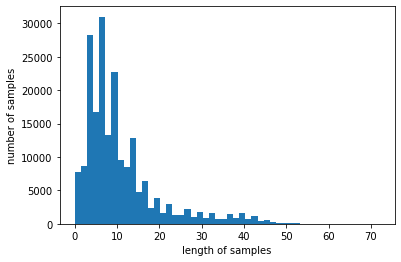

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8778828382492065), ('송강호', 0.8502885103225708), ('박중훈', 0.850069522857666), ('이정재', 0.8448969721794128), ('최민수', 0.844124972820282), ('엄정화', 0.8440042734146118), ('강지환', 0.842502236366272), ('김명민', 0.837706446647644), ('안성기', 0.8365885019302368), ('주진모', 0.833758533000946)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('무협', 0.8730586767196655), ('호러', 0.8645143508911133), ('슬래셔', 0.8605858087539673), ('느와르', 0.8421926498413086), ('물', 0.8336173295974731), ('무비', 0.8279067277908325), ('멜로', 0.811174213886261), ('물의', 0.8094125390052795), ('헐리우드', 0.7883111238479614), ('교과서', 0.7843461036682129)]


### 3. 사전 훈련된 Word2Vec 임베딩(Pretrained Word2Vec embedding) 소개
* 구글이 제공하는 사전 훈련된 Word2Vec 모델 사용
* 사전훈련된 3백만 개의 단어 벡터 제공
* 각 임베딩 벡터의 차원은 300

In [ ]:
import gensim

In [ ]:
!git clone https://github.com/mmihaltz/word2vec-GoogleNews-vectors.git

Cloning into 'word2vec-GoogleNews-vectors'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [ ]:
import os

os.listdir('word2vec-GoogleNews-vectors')

['README.md',
 'GoogleNews-vectors-negative300.bin.gz',
 '.gitattributes',
 '.git']

In [ ]:
#a = os.system('GoogleNews-vectors-negative300.bin.gz')
#path = get_file(MODEL + '.gz', 'https://deeplearning4jblob.blob.core.windows.net/resources/wordvectors/%s.gz' % MODEL)
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
 
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz",binary = True)


--2021-10-22 14:31:18--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.133.48
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.133.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  15.4MB/s    in 1m 46s  

2021-10-22 14:33:05 (14.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
# import zipfile

# zip_file=zipfile.ZipFile("test.zip")
# zip_file.extractall()

32512

In [ ]:
# model = gensim.models.KeyedVectors.load_word2vec_format('', binary=True)

In [ ]:
print(model.vectors.shape)

(3000000, 300)


In [ ]:
print (model.similarity('this', 'is'))
print (model.similarity('post', 'book'))

0.40797037
0.057204384


In [ ]:
print(model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

최근 Word2Vec은 추천시스템에도 사용됨

## 04) 네거티브 샘플링을 이용한 Word2Vec 구현 Skip-Gram with Negative Sampling
### 1. 네거티브 샘플링
* Word2Vec의 출력층: 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트
* 네거티브 샘플링: Word2Vec이 학습 과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 함
  * 하나의 중심 단어에 대해서 작은 단어 집합 만든 후 마지막 단계를 이진 분류 문제로 변환
  * 기존의 단어 집합의 크기만큼 선택지를 두고 다중 클래스 분류 문제를 풀던 Word2Vec보다 훨씬 연산량에서 효율적


### 2. 네거티브 샘플링 Skip-Gram (SGNS)
* Skip-Gram: 입력은 중심 단어, 모델의 예측은 주변 단어
* SGNS: 중심 단어와 주변 단어 **모두**가 입력, 이 **두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계**인지 그 확률 예측  
  > 주변 단어 관계까 아닌 단어들을 입력2로 삼기 위하여 레이블을 0으로  

* 두 테이블 중 하나는 입력 1인 중심단어의 테이블 룩업을 위한 임베딩 테이블, 하나는 입력 2인 주변 단어의 테이블 룩업을 위한 임베딩 테이블
* 각 임베딩 테이블을 통해 테이블 룩업하여 임베딩 벡터로 변환
* 중심 단어와 주변 단어의 내적값을 이 모델의 예측값, 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트

### 3. 20 뉴스그룹 데이터 전처리하기

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# 하나의 샘플에 최소 단어 2개는 있어야 함
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 : ', len(documents))

총 샘플 수 :  11314


In [ ]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3 이하인 단어는 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
# null값 있는지 확인
news_df.isnull().values.any()

False

In [ ]:
# 빈 값 유무 확인
# 모든 빈 값을 Null 값으로 변환, 다시 확인
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [ ]:
# Null값 제거
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# 불용어 제거하여 단어의 수 줄어듦. 모든 샘플 중 단어가 1개 이하인 경우 모두 찾아 제거
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
# 단어 집합 생성, 정수 인코딩 진행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [ ]:
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [ ]:
# 단어 집합 크기 확인
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


### 4. 네거티브 샘플링 통한 데이터셋 구성
* 토큰화, 정제, 정규화, 불용어 제거, 정수 인코딩까지 일반적인 전처리 과정 거침
* 네거티브 샘플링 위해서 keras의 skipgrams 사용
* 상위 10개의 뉴스그룹 샘플에 대해서만 수행

In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [ ]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
      print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(guilt (4989), chow (20699)) -> 0
(existance (4865), achtung (26602)) -> 0
(israeli (442), thermocouple (63915)) -> 0
(subsidizing (15228), degree (1530)) -> 1
(think (6), sodom (13039)) -> 0


In [ ]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [ ]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


In [ ]:
# 모든 뉴스그룹 샘플에 대해서 수행
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

### 5. Skip-Gram with Negative Sampling SGNS 구현

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
# 임베딩 벡터 차원
embed_size = 100

In [ ]:
# 모델 설계
# 두 개의 임베딩 테이블 생성

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [ ]:
# 각 단어는 임베딩 테이블을 거쳐 내적 수행, 내적의 결과는 1 또는 0으로 예측하기 위해서 시그모이드 함수를 활성화 함수로 거쳐 최종 예측값 얻음
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

In [ ]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
# 모델의 학습
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

### 6. 결과 확인

In [ ]:
import gensim

# 학습된 임베딩 벡터들은 vector.txt에 저장
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
# 쉽게 유사도 구할 수 있음
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)
w2v.most_similar(positive=['soldiers'])

In [ ]:
w2v.most_similar(positive=['doctor'])

In [ ]:
w2v.most_similar(positive=['police'])

In [ ]:
w2v.most_similar(positive=['knife'])

In [ ]:
w2v.most_similar(positive=['engine'])

## 05) 글로브 GloVe
* 카운트 기반과 예측 기반을 모두 사용하는 방법론
* 2014년에 미국 스탠포드 대학에서 개발한 단어 임베딩 방법론
* 앞서 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반 Word2Vec의 단점 지적하며 이를 보완

### 1. 기존 방법론에 대한 비판
* LSA: DTM이나 TD-IDF 행렬과 같이 **각 문서에서의 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미 끌어내느 방법론**
  * 카운트 기반으로 코퍼스의 전체적인 통계 정보 고려. 하지만 **단어 의미의 유추 작업 Analogy task에는 성능이 떨어짐**  

* Word2Vec: 예측 기반. 단어 간 유추 작업에는 LSA보다 뛰어남. **임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보 반영 못함**
* 이러한 점을 비판하여 카운트 기반과 예측 기반 방법론 두 가지 모두 사용

### 2. 윈도우 기반 동시 등장 행렬 Window based Co-occurrence Matrix
* 단어의 동시 등장 행렬 Co-occurrence Matrix: 행과 열을 전체 단어 집합의 단어들로 구성. 
  * i 단어의 Window Size 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
  * Transpose해도 동일한 행렬이 된다는 특징


### 3. 동시 등장 확률 Co-occurence Probability
* P(k|i): 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률
  * i: Center Word, k: Context Word
  * 중심 단어 i의 행의 모든 값을 더한 값을 분모, i행 k열의 값을 분자로 한 값


### 4. 손실 함수 Loss Function
* X: 동시 등장 행렬 Co-occurence Matrix
* Xij: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 j가 등장하는 횟수
* sigma j Xij: 동시 등장 행렬에서 i행의 값을 모두 더한 값
* Pik = P(k|i) = Xik/Xi: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률
  * ex) P(solid|ice) =  ice가 등장했을 때 solid가 등장할 확률
* Pik/Pjk
  ex) P(solid|ice)/P(solid|steam) = 8.9
* wi: 중심 단어 i의 임베딩 벡터
* ὦk: 주변 단어 k의 임베딩 벡터



* GloVe in one sentence
  > 임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서 동시 등장 확률이 되도록 만드는 것
  > dot product(wi ὦk) ≈ P(k|i) = Pik

  > 더 정확하게는,
  > dot product(wi ὦk) ≈ logP(k|i) = logPik 

* 손실 함수: 단어 간의 관계 잘 표현해야 함
  > F(wi, wj, ὦk) = Pik/Pjk
* F의 목적: 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩 하는 것이 목적
* F의 입력: 
  > F(wi - wj, ὦk) = Pik/Pjk
* 우변은 스칼라, 좌변은 벡터. Dot product 수행
  > F((wi - wj)Tὦk) = Pik/Pjk
  * Linear space에서의 단어 의미 관계 표현 위해 뺄셈과 내적 택함  


* F가 만족해야 할 필수 조건: 중심 단어 w와 주변 단어 ὦ라는 선택 기준은 실제로는 무작위 선택이므로 둘의 관계는 자유롭게 교환될 수 있도록 해야됨
  * **F가 실수의 덧셈과 양수의 곱셈에 대해서 *준동형 Homomorphism*을 만족하도록 함**
    > F(a+b) = F(a)F(b)
* F에 적용
  > F(v1Tv2 + v3Tv4) = F(v1Tv2)F(v3Tv4)
* 뺄셈에 대한 준동형식으로 변경
  > F(v1Tv2 - v3Tv4) = F(v1Tv2) / F(v3Tv4)
* 이를 Glove씩에 적용
  > F((wi - wj)Tὦk) = F(wiTὦk) / F(wjTὦk)
* 우변
  > Pik/Pjk = F(wiTὦk) / F(wjTὦk)
  > F(wiTὦk) = Pik = Xik/Xi
* 좌변
  > F(wiTὦk - wjTὦk) = F(wiTὦk) / F(wjTὦk)

* F 함수에 지수 함수
  > expF(wiTὦk - wjTὦk) = expF(wiTὦk) / expF(wjTὦk)

  > wiTὦk = logPik = log(Xik/Xi) = logXik - logXi

* wi와 ὦk는 값 바뀌어도 식 성립
* logXi항을 wi에 대한 편향 bi로 대체
  > wiTὦk + bi + b tilde - logXik
* 손실함수 일반화
  * Loss func = V sigma m, n = (wmTὦn + bm + b tilde n - logXmn)^2
    * V는 단어 집합의 크기. 
    * Still 문제.. 
        * logXik에서 Xik 값이 0이 될 수 있으므로 log(1+Xik)로 변경
        * 동시 등장 행렬 X는 DTM처럼 희소 행렬 Sparse Matrix일 가능성 다분.
          * Xik 갑에 영향을 받는 가중치 함수 Weighting function f(Xik)를 손실 함수에 도임
            * Xik 값이 작으면 상대적으로 함수의 값은 작은데, 크면 최대값이 정해져 있음
              > f(x) = min(1, (x/xmax)^3/4)
* **최종**
  > Loss func = V sigma m, n = f(Xmn)(wmTὦn + bm + b tilde n - logXmn)^2        


### 5. GloVe 훈련시키기

In [ ]:
!python -m pip install glove_python_binary

In [ ]:
# glov_python_library가 계속 import error가 나서 대신 mittens를 사용했음
# 근데 mittens에는 Corpus가 없어 오류가 남..
!pip install -U mittens
from mittens import GloVe as Glove

In [ ]:
# from glove_pybind import *
# from .Glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

In [ ]:
print(glove.most_similar("man"))
print(glove.most_similar("boy"))
print(glove.most_similar("university"))

## 06) 패스트텍스트(FastText)
* 페이스북 개발
* Word2Vec는 단어를 쪼개질 수 없는 단위로 생각
* FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것, 즉 **내부 단어(subword)를 고려**하여 학습

### 1. 내부 단어(subword)의 학습
* FastText에서는 각 단어는 글자 단위 n-gram의 구성으로 취급함
  * n=3, apple은 app,ppl,ple로 분리
    > n = 3 ==> <ap, app, ppl, ple, le>, <apple>
  * n의 최솟값과 최댓갑. 기본적으로는 3과 6으로 설정.
    > <ap, app, ppl, ppl, le>, <app, appl, pple, ple>, <appl, pple>, ..., <apple>
  * 내부 단어들을 벡터화(aka Word2Vec 수행)
  > apple = <ap + app + ppl + ppl + le> + <app + appl + pple + ple> + <appl + pple> + , ..., +<apple>

### 2. 모르는 단어(Out of Vocabulary, OOV)에 대한 대응
  * 장점: 데이터셋만 충분하다면 **subword를 통해 OOV에 대해서도 다른 단어와의 유사도를 계산 가능**
    * ex. birthplace를 몰라도 birth와 place라는 subword가 있다면 birthplace의 벡터를 얻을 수 있음
    * 모르는 단어에 제대로 대처할 수 없는 **Word2Vec, GloVe와는 다른 점**

### 3. 단어 집합 내 빈도 수가 적었던 단어(Rare Word)에 대한 대응
* Word2Vec의 경우에는 rare word에 대해서는 임베딩의 정확도가 높지 않다는 단점
  * 참고할 수 있는 경우의 수가 적다보니 정확하게 임베딩이 되지 않는 경우
* **하지만** FastText의 경우, **단어가 희귀 단어라도, 그 단어의 n-gram이 다른 단어의 n-gram과 겹치는 경우**라면, Word2Vec과 비교하여 **비교적 높은 임베딩 벡터값을 얻음**
* FastText가 노이즈가 많은 코퍼스에서 강점을 가진 것 또한 이와 같은 이유
  * Word2Vec에서는 오타가 섞인 단어는 임베딩이 제대로 되지 않지만, FastText는 이에 대해서도 일정 수준의 성능을 보임
    * ex. 단어 apple과 appple의 경우, 실제로 많은 개수의 동일한 n-gram을 가짐


### 4. 실습으로 비교하는 Word2Vec Vs. FastText
#### 1) Word2Vec
* 학습 데이터에 존재하지 않는 단어에 대해서는 임베딩 벡터가 존재하지 않아 단어의 유사도를 계산 불가능


#### 2) FastText
* 유사한 단어를 계산해서 출력하고 있음


In [ ]:
from gensim.models import FastText
model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [ ]:
model.wv.most_similar("electrofishing")

#### 5. 한국어에서의 FastText
1. 음절 단위
* ex. n=3, '자연어처리' => <자연, 자연어, 연어처, 어처리, 처리>

2. 자모 단위(총성, 중성, 종성 단위)
* 오타나 노이즈 측면에서 더 강한 임베딩 기대 가능
> 분리된 결과 : ㅈ ㅏ _ ㅇ ㅕ ㄴ ㅇ ㅓ _ ㅊ ㅓ _ ㄹ ㅣ _
* n = 3일 때 n-gram 적용
> < ㅈ ㅏ, ㅈ ㅏ _, ㅏ _ ㅇ, ... 중략>

## 07) 자모 단위 한국어 FastText 학습하기
## 08) 사전 훈련된 워드 임베딩 Pre-trained Word Embedding
* 케라스의 임베딩 층과 사전 훈련된 임베딩층을 가져와서 사용
* 훈련 데이터의 단어들을 임베딩 층을 구현하여 임베딩 벡터로 학습하는 경우.
  * 케라스에서는 이를 Embedding()이라는 도구를 사용하여 구현
* **그런데** 방대한 코퍼스를 가지고 Word2Vec, FastText, GloVe 등을 통해서 이미 미리 훈련된 임베딩 벡터를 불러오는 방법 사용 경우도 있음

### 1. Keras Embedding layer
* 케라스는 훈련 데이터의 단어들에 대해 워드 임베딩을 수행하는 도구 Embedding()을 제공
* Embedding()은 인공 신경망 구조 관점에서 임베딩 층(embedding layer)을 구현


#### 1) 임베딩 층은 룩업 테이블이다.
* 임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.
  > 어떤 단어 -> 단어에 부여된 고유한 정수값 -> 임베딩 층 통과 -> 밀집 벡터
* 임베딩 층은 입력 정수에 대해 dense vector로 맵핑하고 이 dense vector는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련
* 이 dense vector를 임베딩 벡터라고 부름


* 정수를 밀집 벡터/임베딩 벡터로 맵핑한다는 것의 의미?
  * 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있음
    * 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가짐


* (+) 임베딩 층의 입력이 원-핫 벡터가 아니어도 동작한다!
  * 케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 한 번 더 바꾸고나서 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인덱스로만 바꾼채로 임베딩 층의 입력으로 사용해도 룩업 테이블된 결과인 임베딩 벡터를 리턴

In [ ]:
# 케라스의 임베딩 층 구현 코드
# 아래의 각 인자는 저자가 임의로 선정한 숫자들이며 의미있는 선정 기준이 아님
v = Embedding(20000, 128, input_length = 500)
# vocab_size = 20000 텍스트 데이터의 전체 단어 집합의 크기
# output_dim = 128 워드 임베딩 후의 임베딩 벡터의 차원
# input_length = 500 입력 시퀀스의 길이

* Embedding()은 (# of samples, input_length)인 2D 정수 텐서 입력받음
  * 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스
* Embedding()은 워드 임베딩 작업 수행하고 (# of samples, input_length, embedding word dimensionality)인 3D 실수 텐서 리턴


#### 2) 임베딩 층 사용하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# 문장과 레이블 데이터를 만들었음
# 긍정인 문장은 레이블 1, 부정인 문장은 레이블이 0
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'hhighly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [3]:
# 케라스의 Tokenizer()를 사용하여 토큰화 시킴
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

16


In [4]:
# 각 문장에 대해서 정수 인코딩 수행
X_encoded = tokenizer.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [6]:
# 가장 길이가 긴 문장의 길이
max_len = max(len(l) for l in X_encoded)
print(max_len)

4


In [7]:
# 모든 문장을 패딩하여 길이를 4로 만들어줌
# 훈련 데이터에 대한 전처리가 끝남
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [8]:
# 모델 설계
# 출력층에 1개의 뉴런에 활성화 함수로는 시그모이드 함수를 사용하여 이진 분류 수행
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [9]:
# 테스트 데이터에 대한 정확도가 아니며, 훈련 데이터도 양이 적어서 정확도에는 의미는 없지만
# 말하고자 하는 바: 현재 각 단어들의 임베딩 벡터들의 값은 학습 과정에서 다른 가중치들과 함께 학습된 값
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6866 - acc: 0.7143
Epoch 2/100
1/1 - 0s - loss: 0.6850 - acc: 0.7143
Epoch 3/100
1/1 - 0s - loss: 0.6834 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6819 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6803 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.6787 - acc: 0.7143
Epoch 7/100
1/1 - 0s - loss: 0.6771 - acc: 0.8571
Epoch 8/100
1/1 - 0s - loss: 0.6755 - acc: 0.8571
Epoch 9/100
1/1 - 0s - loss: 0.6740 - acc: 0.8571
Epoch 10/100
1/1 - 0s - loss: 0.6724 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.6708 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.6692 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.6675 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.6659 - acc: 0.8571
Epoch 15/100
1/1 - 0s - loss: 0.6643 - acc: 0.8571
Epoch 16/100
1/1 - 0s - loss: 0.6627 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.6611 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.6594 - acc: 0.8571
Epoch 19/100
1/1 - 0s - loss: 0.6578 - acc: 0.8571
Epoch 20/100
1/1 - 0s - loss: 0.6562 - a

### 2. 사전 훈련된 워드 임베딩 Pre-Trained Word Embedding 사용하기
* GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip
* Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

#### 1) 사전 훈련된 GloVe 사용하기

In [14]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

In [ ]:
# 임베딩 층을 설계하기 위한 과정부터 달라짐
# 압축본 안에 4개의 파일. 이 중 glove.6B.100d.txt 파일 사용

In [15]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall()
zf.close()

In [16]:
# glove.6B.100d.txt에 있는 모든 임베딩 벡터들 불러모음
# 형식은 파이썬의 Dictionary 구조
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf-8")

for line in f:
  word_vector = line.split()
  word = word_vector[0]

  # 100개의 값을 가지는 array로 변환
  word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
  embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [17]:
# 임의의 단어 respectable에 대해서 임베딩 벡터 출력
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

In [18]:
# 벡터값이 출력되며 길이는 100인 것을 확인
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 행렬의 값은 전부 0으로 채움. 이 행렬에 사전 훈련된 임베딩 값을 넣어줄 것.

embedding_matrix = np.zeros((vocab_size, 100))
np.shape(embedding_matrix)

(16, 100)

In [19]:
print(tokenizer.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('hhighly', 14), ('respectable', 15)])


In [20]:
# 사전 훈련된 GloVe에서 great의 벡터값 확인
print(embedding_dict['great'])

[-0.013786   0.38216    0.53236    0.15261   -0.29694   -0.20558
 -0.41846   -0.58437   -0.77355   -0.87866   -0.37858   -0.18516
 -0.128     -0.20584   -0.22925   -0.42599    0.3725     0.26077
 -1.0702     0.62916   -0.091469   0.70348   -0.4973    -0.77691
  0.66045    0.09465   -0.44893    0.018917   0.33146   -0.35022
 -0.35789    0.030313   0.22253   -0.23236   -0.19719   -0.0053125
 -0.25848    0.58081   -0.10705   -0.17845   -0.16206    0.087086
  0.63029   -0.76649    0.51619    0.14073    1.019     -0.43136
  0.46138   -0.43585   -0.47568    0.19226    0.36065    0.78987
  0.088945  -2.7814    -0.15366    0.01015    1.1798     0.15168
 -0.050112   1.2626    -0.77527    0.36031    0.95761   -0.11385
  0.28035   -0.02591    0.31246   -0.15424    0.3778    -0.13599
  0.2946    -0.31579    0.42943    0.086969   0.019169  -0.27242
 -0.31696    0.37327    0.61997    0.13889    0.17188    0.30363
 -1.2776     0.044423  -0.52736   -0.88536   -0.19428   -0.61947
 -0.10146   -0.26301  

In [22]:
# 훈련 데이터의 단어 집합의 모든 단어에 대해서 사전 훈련된 GloVe의 임베딩 벡터들을 맵핑한 후에 great의 벡터값이 잘 들어갔는지 확인
for word, index in tokenizer.word_index.items():
  # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
  vector_value = embedding_dict.get(word)
  if vector_value is not None:
    embedding_matrix[index] = vector_value

In [23]:
embedding_matrix[2]

# 이전에 확인한 사전에 훈련된 GloVe에서의 great의 벡터값과 일치

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

In [24]:
# Embedding layer에 우리가 만든 매트릭스를 초기값으로 설정
# 현재 실습에서 사전 훈련된 워드 임베딩을 100차원의 값인 것으로 사용하고 있기 때문에 임베딩 층의 output_dim의 인자값으로 100을 주어야 함
# 사전 훈련된 워드 임베딩을 그대로 사용할 것이므로, 별도로 더 이상 훈련을 하지 않겠다는 옵션을 줌

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length = max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.8543 - acc: 0.2857
Epoch 2/100
1/1 - 0s - loss: 0.8315 - acc: 0.2857
Epoch 3/100
1/1 - 0s - loss: 0.8094 - acc: 0.2857
Epoch 4/100
1/1 - 0s - loss: 0.7879 - acc: 0.2857
Epoch 5/100
1/1 - 0s - loss: 0.7672 - acc: 0.4286
Epoch 6/100
1/1 - 0s - loss: 0.7471 - acc: 0.4286
Epoch 7/100
1/1 - 0s - loss: 0.7276 - acc: 0.4286
Epoch 8/100
1/1 - 0s - loss: 0.7088 - acc: 0.4286
Epoch 9/100
1/1 - 0s - loss: 0.6905 - acc: 0.4286
Epoch 10/100
1/1 - 0s - loss: 0.6729 - acc: 0.4286
Epoch 11/100
1/1 - 0s - loss: 0.6559 - acc: 0.5714
Epoch 12/100
1/1 - 0s - loss: 0.6394 - acc: 0.5714
Epoch 13/100
1/1 - 0s - loss: 0.6234 - acc: 0.5714
Epoch 14/100
1/1 - 0s - loss: 0.6080 - acc: 0.7143
Epoch 15/100
1/1 - 0s - loss: 0.5931 - acc: 0.7143
Epoch 16/100
1/1 - 0s - loss: 0.5786 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.5646 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.5511 - acc: 0.8571
Epoch 19/100
1/1 - 0s - loss: 0.5379 - acc: 0.8571
Epoch 20/100
1/1 - 0s - loss: 0.5252 - a

#### 2) 사전 훈련된 Word2Vec 사용하기

In [25]:
import gensim

In [26]:
# 구글의 사전 훈련된 Word2Vec 모델을 로드하여 word2vec_model에 저장
urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [34]:
print(word2vec_model.vectors.shape) # 모델의 크기 확인
# 300의 차원을 가진 Word2Vec 벡터가 3,000,000개 있음

(3000000, 300)


In [35]:
# 모든 값이 0으로 채워진 임베딩 행렬을 만들어줌
# 문제의 단어는 총 16개. 16 x 300의 크기를 가진 행렬을 만듬
embedding_matrix = np.zeros((vocab_size, 300))
np.shape(embedding_matrix)

(16, 300)

In [36]:
# word2vec_model에서 특정 단어를 입력하면 해당 단어의 임베딩 벡터를 리턴받을텐데, 만약 word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None을 리턴하도록 함
def get_vector(word):
  if word in word2vec_model:
    return word2vec_model[word]
  else:
    return None

In [37]:
# 단어집합으로부터 단어를 1개씩 호출하여 word2vec_model에 해당 단어의 임베딩 벡터값이 존재하는지 확인
# if None => 존재한다는 의미. 임베딩 행렬에 해당 단어의 인덱스 위치의 행에 임베딩 벡터의 값을 저장
# 현재 풀고자 하는 문제의 16개의 단어와 맵핑되는 임베딩 행렬 완성
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [38]:
# 기존 word2vec_model에 저장되어 있던 단어 nice의 임베딩 벡터값 확인
print(word2vec_model['nice'])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [39]:
# nice는 현재 단어 집합에서 몇 번 인덱스를 가지는지 확인
print('단어 nice의 정수 인덱스 :', tokenizer.word_index['nice'])

단어 nice의 정수 인덱스 : 1


In [40]:
# 1의 값을 가지므로 embedding_matrix의 1번 인덱스에는 단어 'nice'의 임베딩 벡터값이 있어야 함
# word2vec_model에서 확인했던 것과 동일한 것을 확인 가능
print(embedding_matrix[1])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [41]:
# Embedding에 사전 훈련된 embedding_matrix를 입력으로 넣어주고 모델을 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len, ), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6842 - acc: 0.5714
Epoch 2/100
1/1 - 0s - loss: 0.6662 - acc: 0.7143
Epoch 3/100
1/1 - 0s - loss: 0.6488 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6319 - acc: 0.8571
Epoch 5/100
1/1 - 0s - loss: 0.6155 - acc: 0.8571
Epoch 6/100
1/1 - 0s - loss: 0.5996 - acc: 0.8571
Epoch 7/100
1/1 - 0s - loss: 0.5844 - acc: 1.0000
Epoch 8/100
1/1 - 0s - loss: 0.5696 - acc: 1.0000
Epoch 9/100
1/1 - 0s - loss: 0.5554 - acc: 1.0000
Epoch 10/100
1/1 - 0s - loss: 0.5416 - acc: 1.0000
Epoch 11/100
1/1 - 0s - loss: 0.5284 - acc: 1.0000
Epoch 12/100
1/1 - 0s - loss: 0.5156 - acc: 1.0000
Epoch 13/100
1/1 - 0s - loss: 0.5033 - acc: 1.0000
Epoch 14/100
1/1 - 0s - loss: 0.4915 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.4800 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.4690 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.4583 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.4480 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4380 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.4284 - a

## 09) 엘모 Embeddings from Language Model, ELMo
* 2018년에 제안된 새로운 워드 임베딩 방법론
* 언어 모델로 하는 임베딩
* 가장 큰 특징: **사전 훈련된 언어 모델 Pre-trained language model을 사용**


### 1. ELMo
* Bank Accont와 River Bank는 전혀 다른 의미이지만, Word2Vec이나 GloVe 등으로 표현된 임베딩 벡터들은 이를 제대로 반영 못함
* 같은 표기의 단어라도 문맥에 따라서 다르게 워드 임베딩하자
* **단어를 임베딩하기 전에 전체 문장을 고려해서 임베딩을 하겠다**
> 문맥을 반영한 워드 임베딩 Contextualized Word Embedding

### 2. biLM (Bidirectional Language Model)의 사전 훈련
* ELMo는 위의 그림의 순방향 RNN 뿐만 아니라, 역방향 RNN 또한 활용
* 양쪽 방향의 언어 모델을 둘 다 활용한다고 하여 **biLM**

* ELMo에서 biLM은 기본적으로 다층 구조 Multi-layer를 전제로
* **biLM의 입력이 되는 워드 임베딩 방법**으로는 이 책에서는 다루지 않은 **char CNN** 사용
  * 이는 글자(character) 단위로 계산됨
  * 마치 서브단어(subword)의 정보를 참고하는 것처럼 문맥과 상관 없이 dog와 doggy 간의 연관성을 찾아낼 수 있고, OOV에도 견고함


* **RNN 챕터에서의 양방향 RNN과 ELMo의 biLM은 달라!**
  * 양방향 RNN: 순방향 RNN의 은닉 상태와 역방향의 RNN의 은닉 상태를 **다음 층의 입력으로 보내기 전에** 연결 concatenate시킴
  * biLM: biLM의 순방향 언어모델과 역방향 언어모델이 각각의 은닉 상태만을 **다음 은닉층으로 보내며 훈련시킨 후에 ELMo 표현으로 사용하기 위해서** 은닉 상태를 연결시키는 것과 다름


### 3. biLM의 활용
* ELMo가 사전 훈련된 biLM을 통해 입력 문자응로부터 단어를 임베딩하기 위한 과정
* ex. play를 임베딩하기 위해서는 해당 시점의 BiLM의 각 층의 출력값을 가져옴. 그리고 순방향 언어 모델과 역방향 언어 모델의 각 층의 출력값을 연결 concatenate하고 추가 작업을 진행
* 각 층의 출력값이란 첫번째는 임베딩 층, 나머지 층은 각 츠으이 은닉 상태를 말함
* **각 층의 출력값이 가진 정보는 전부 서로 다른 종류의 정보를 갖고 있을 것이므로, 이들을 모두 활용한다는 점**


* ELMo가 임베딩 벡터를 얻는 과정
#### 1) 각 층의 출력값을 concatenate
#### 2) 각 층의 출력값 별로 가중치를 둠..s1, s2, s3
#### 3) 각 층의 출력값을 모두 더함..가중합
#### 4) 벡터의 크기를 결정하는 스칼라 매개변수 곱함
  * 지금까지는 ELMo 표현(representation)을 얻음


* 이제 ELMo를 입력으로 사용하고 수행하고 싶은 텍스트 분류, 질의 응답 시스템 등의 자연어 처리 작업이 있을 것
* ex. 텍스트 분류 작업
  * ELMo 표현의 기존의 임베딩 벡터와 함께 사용 가능.
  1. 텍스트 분류 위해 GloVE와 같은 기존의 방법론을 사용한 임베딩 벡터 준비함.
  2. GloVe를 사용한 임베딩 벡터만 텍분 작업에 사용하는게 아니라, **이렇게 준비된 ELMo 표현을 GloVe 임베딩 벡터와 concatenate해서 입력으로 사용할 수 있음**
  3. ELMo 표현을 만드는데 사용되는 사전 훈련된 언어의 가중치는 고정, 위에서 사용한 s1, s2, s3와 스칼라 매개변수는 훈련 과정에서 학습됨

### 4. ELMo 표현을 이용해서 스팸 메일 분류


In [1]:
%tensorflow_version 1.x 

TensorFlow 1.x selected.


In [2]:
# 텐서플로우 허브로부터 다양한 pre-trained model들을 사용 가능
!pip install tensorflow-hub

In [3]:
import tensorflow_hub as hub
import tensorflow as tf
from keras import backend as K
import urllib.request
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [4]:
# 텐서플로우 허브로부터 ELMo를 다운로드
elmo = hub.Module("https://tfhub.dev/google/elmo/1", trainable=True)

sess = tf.Session()
K.set_session(sess)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [8]:
# 스팸 메일 분류하기 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin-1')
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
# v1열을 숫자 레이블로 바꿈
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
y_data = list(data['v1'])
X_data = list(data['v2'])

In [10]:
X_data[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [11]:
# 훈련 데이터와 테스트 데이터를 8:2로 분할
print(len(X_data))
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)
print(n_of_train)
print(n_of_test)

5572
4457
1115


In [12]:
# 데이터 분할
X_train = np.asarray(X_data[:n_of_train]) #X_data 데이터 중에서 앞의 4457개의 데이터만 저장
y_train = np.asarray(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4457개의 데이터만 저장
X_test = np.asarray(X_data[n_of_train:]) #X_data 데이터 중에서 뒤의 1115개의 데이터만 저장
y_test = np.asarray(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1115개의 데이터만 저장

In [13]:
# ELMo는 텐서플로우 허브에서 가져온 것. 케라스에서 사용하기 위해서는 케사르에서 사용할 수 있도록 변환해주는 작업 필요
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]
# 데이터의 이동이 케라스 → 텐서플로우 → 케라스가 되도록 하는 함수

In [14]:
# 모델 설계
from keras.models import Model
from keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=[input_text], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ELMo를 이용한 임베딩 층을 거쳐서 256개의 뉴런이 있는 은닉층을 거친 후 마지막 1개의 뉴런을 통해 이진 분류 수ㅐㅇ
# 활성화 함수 sigmoid, 모델 loss func는 binary_crossentropy

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
history = model.fit(X_train, y_train, epochs=1, batch_size=60)

Epoch 1/1
4457/4457 [==============================] - 773s 173ms/step - loss: 0.1314 - accuracy: 0.9509


In [16]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1115/1115 [==============================] - 168s 151ms/step

 테스트 정확도: 0.9713
